This code is a Python script which performs the Knight algorithm given in our MA2900 Problem Solving paper, to create an equilateral simple polygon with n sides.



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.path as pltpath
import matplotlib.patches as patches
import random

class Knight():
    '''Our walking knight, which can be moved by a vector'''
    
    def __init__(self):
        self.position = np.array([0,0])
    def move(self, array):
        self.position = self.position + array
        
    def __repr__(self):
        return "(" + str(self.position) + ")"

In [ ]:
def createpolygon(n):
    '''creates an even-sided equilateral polygon with vertices all in Z2'''
    k = Knight()
    if n % 2 == 1:
        raise Exception("It is only possible to create polygons with an even number of sides")
        
    ### Defining moveset and required variables
    #Because this uses the algorithm where one direction is 'forbidden', 
    #these movement vectors are the ones in the knight group 
    #without left-moving ones
    moves = np.array([[2,1],[2,-1],[1,2],[1,-2]])
    lastmove = moves[random.randint(0,3)]
    
    #Numpy won't let me make empty flexible arrays >:(
    outward_positions = np.array([0,0])
    outward_movelist = np.array([0,0])
    i = 0
    
    ### Creates n/2 vertices, i.e. step 2 of the algorithm
    while i < (n / 2):
        newmove = moves[random.randint(0,3)]
        if not (np.array_equal(newmove, lastmove)):
            lastmove = newmove
            k.move(lastmove)
            outward_positions = np.vstack((outward_positions, k.position))
            outward_movelist = np.vstack((outward_movelist, lastmove))
            i += 1
            
    outward_movelist = np.delete(outward_movelist, 0, 0)
        
    ### Checks the paths do not intersect    
    #workaround_positions is required due to a matplotlib bug meaning 
    #if two lines end at the same point, path_intersect always returns TRUE
    workaround_positions = np.delete(outward_positions, 0, 0)
    workaround_positions = np.delete(workaround_positions, -1, 0)
    codes = [1]
    codes += [2] * int(n/2 - 2)
    path_so_far = pltpath.Path(workaround_positions, codes)
    checkpath = pltpath.Path([k.position, [0,0]], [1,2])
    if checkpath.intersects_path(path_so_far):
        createpolygon(n)
        return
    
    ### Moves the piece by the inverse of all the moves from step 2
    full_positions = outward_positions
    for move in outward_movelist:
        if not (np.array_equal(move, [0,0])):
            k.move(-1 * move)
            full_positions = np.vstack((full_positions, k.position))
    codes = [1]
    codes += [2] * (len(full_positions) - 1)
        
    ### Draws polygon
    fig, ax = plt.subplots()
    full_path = pltpath.Path(full_positions, codes)
    patch = patches.PathPatch(full_path, facecolor='white', lw=2)
    ax.add_patch(patch)
    ax.set_xlim(-1, n)
    ax.set_ylim(-n, n)
    plt.show()

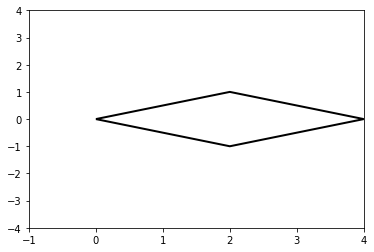

In [ ]:
createpolygon(4)

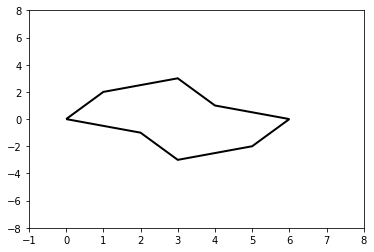

In [ ]:
createpolygon(8)

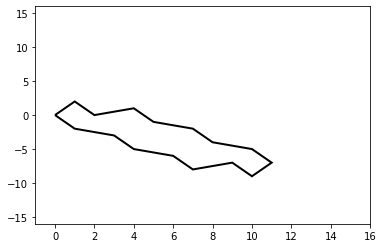

In [ ]:
createpolygon(16)

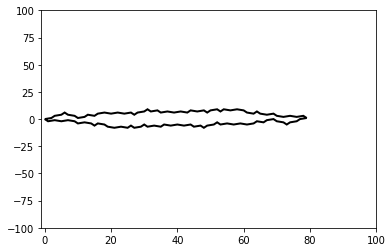

In [ ]:
createpolygon(100)